In [1]:
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Getting rid of outliers|

In [2]:
## Load the data into a DataFrame
stores=pd.read_csv('/Users/austinlasseter/DSI-EC-2/projects/datasets/iowa_stores.csv')
stores=stores.drop(['Unnamed: 0'], axis=1)
stores.head()

,store_id,fips,metro,unemployment,income,population,ave_bottle_price,ave_number_bottles,annual_profit_per_store
0,2106,19013,3.0,4.7,50887.0,131090.0,16.225173,19.588247,564860.3596
1,2113,19187,5.0,4.0,48013.0,38013.0,15.963071,4.763409,33857.9524
2,2130,19013,3.0,4.7,50887.0,131090.0,15.423895,18.374778,436217.3732
3,2152,19033,5.0,3.7,53109.0,44151.0,12.897199,4.131010,28489.2710
4,2178,19005,6.0,5.0,49439.0,14330.0,15.046966,7.699587,110017.9018


13.631341272928


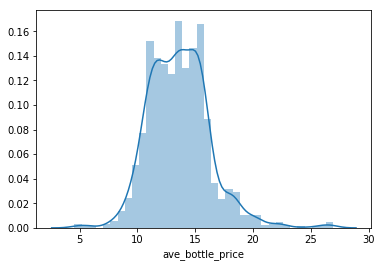

In [3]:
# Average bottle price: Some stores sell only "expensive" or "cheap" bottles, but most fall around the mean (13).
print(stores[stores['ave_bottle_price']<30]['ave_bottle_price'].mean())
sns.distplot(stores[stores['ave_bottle_price']<30]['ave_bottle_price']);

In [4]:
# How many outliers are we talking about? Just two.
print(len(stores))
print(len(stores[stores['ave_bottle_price']>=30]))

1375
2


In [5]:
# Let's exclude those 2 outlier stores:
stores=stores[stores['ave_bottle_price']<30]
len(stores)

1373

10.157047323626767


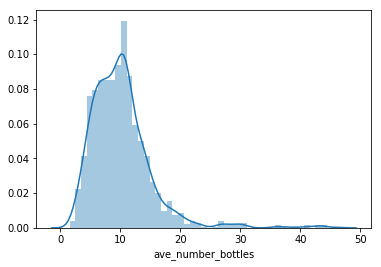

In [6]:
# Once you exclude whole-sale stores (there are a few outliers), most stores purchase about 10 bottles in an order. 
print(stores[stores['ave_number_bottles']<50]['ave_number_bottles'].mean())
sns.distplot(stores[stores['ave_number_bottles']<50]['ave_number_bottles']);

In [7]:
# How many outliers are we talking about? Just 8.
print(len(stores))
print(len(stores[stores['ave_number_bottles']>=50]))

1373
8


In [8]:
# Let's exclude those 8 outlier stores:
stores=stores[stores['ave_number_bottles']<50]
len(stores)

1365

48249.49529961271


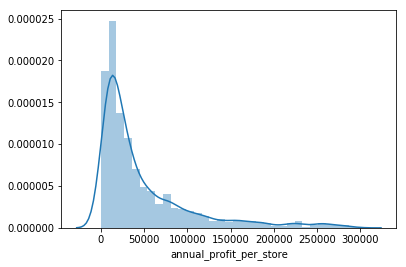

In [9]:
# What's the annual profit of most stores, once you exclude outliers? About $48,000 per year.
print(stores[stores['annual_profit_per_store']<300000]['annual_profit_per_store'].mean())
sns.distplot(stores[stores['annual_profit_per_store']<300000]['annual_profit_per_store']);

In [10]:
# How many outliers are we talking about? There are 74. I'll bet these are super-large wholesalers.
print(len(stores))
print(len(stores[stores['annual_profit_per_store']>=300000]))

1365
74


In [11]:
# Let's exclude those 74 outlier stores:
stores=stores[stores['annual_profit_per_store']<300000]
len(stores)

1291

## Looking for possible correlations

In [21]:
# Let's start with a simple correlation table:
stores.corr()

,store_id,fips,metro,unemployment,income,population,ave_bottle_price,ave_number_bottles,annual_profit_per_store
store_id,1.000000,-0.017432,-0.077142,-0.017288,0.078011,0.036578,-0.222827,0.293440,-0.502152
fips,-0.017432,1.000000,-0.291552,-0.187008,0.178691,0.344316,0.011668,-0.009861,0.015049
metro,-0.077142,-0.291552,1.000000,0.009260,-0.561239,-0.659529,0.110569,-0.122186,-0.041035
unemployment,-0.017288,-0.187008,0.009260,1.000000,-0.447775,-0.080402,-0.097400,0.107687,0.028895
income,0.078011,0.178691,-0.561239,-0.447775,1.000000,0.511829,-0.027154,-0.002920,-0.023879
population,0.036578,0.344316,-0.659529,-0.080402,0.511829,1.000000,-0.027688,0.054239,0.026042
ave_bottle_price,-0.222827,0.011668,0.110569,-0.097400,-0.027154,-0.027688,1.000000,-0.162264,0.338328
ave_number_bottles,0.293440,-0.009861,-0.122186,0.107687,-0.002920,0.054239,-0.162264,1.000000,0.023058
annual_profit_per_store,-0.502152,0.015049,-0.041035,0.028895,-0.023879,0.026042,0.338328,0.023058,1.000000


In [22]:
# Wow, that was tough to read. Really I just want to see correlations with my outcome, annual profit.
stores[stores.columns[1:]].corr()['annual_profit_per_store'][:-1]

fips                  0.015049
metro                -0.041035
unemployment          0.028895
income               -0.023879
population            0.026042
ave_bottle_price      0.338328
ave_number_bottles    0.023058
Name: annual_profit_per_store, dtype: float64

## Okay, let's map out each of those correlations with a scatter plot.

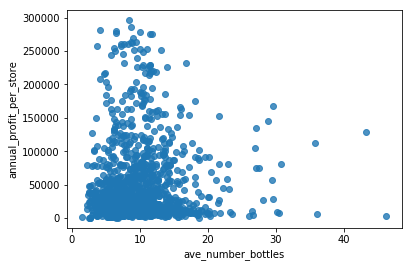

In [28]:
# Stores with a high annual profit usually have an average number of bottles per sale.
sns.regplot(x=stores['ave_number_bottles'], y=stores['annual_profit_per_store'], fit_reg=False)

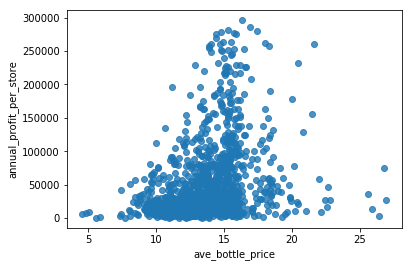

In [35]:
# Stores that mostly sell super-high-priced bottles don't have a high annual profit.
sns.regplot(x=stores['ave_bottle_price'], y=stores['annual_profit_per_store'], fit_reg=False)

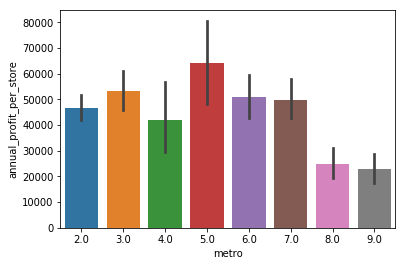

In [32]:
# Stores located in suburban counties (metro=5) have the highest annual profit, and rural ones have the lowest.
sns.barplot(x=stores['metro'], y=stores['annual_profit_per_store'])

## County Unemployment

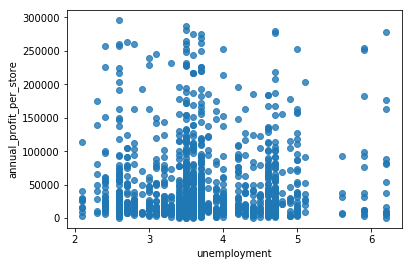

In [40]:
# The percent unemployment in the county doesn't seem to have much relationship with annual profits
sns.regplot(x=stores['unemployment'], y=stores['annual_profit_per_store'], fit_reg=False)

In [82]:
# What's the range?
stores.unemployment.describe()

count    1291.000000
mean        3.716809
std         0.764759
min         2.100000
25%         3.400000
50%         3.600000
75%         4.200000
max         6.200000
Name: unemployment, dtype: float64

In [90]:
# Maybe binning it will draw out some patterns:
bins = [2, 3, 4, 5, 6, 7]
stores['unemp_bins'] = pd.cut(stores['unemployment'], bins)

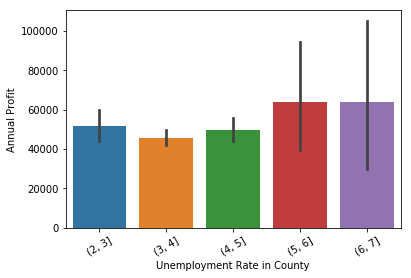

In [92]:
# Stores located in high-unemployment counties have higher annual profits. That seems strange.
ax = sns.barplot(x=stores['unemp_bins'], y=stores['annual_profit_per_store'])
ax.set(xlabel='Unemployment Rate in County', ylabel='Annual Profit')
labels = ax.get_xticklabels() # get x labels
ax.set_xticklabels(labels, rotation=30)
plt.show()

### Average Income

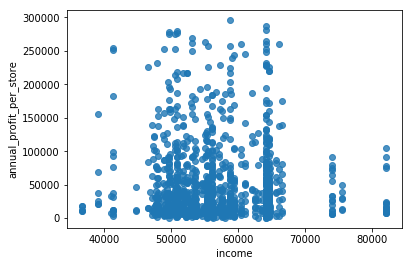

In [42]:
# With regard to the average income in the county, stores in either low or high-end counties have lower annual profits
sns.regplot(x=stores['income'], y=stores['annual_profit_per_store'], fit_reg=False)

In [103]:
# Let's try binning
bins = [0, 40000, 47000, 50000,  70000, 80000, 100000]
stores['income_bins'] = pd.cut(stores['income'], bins)

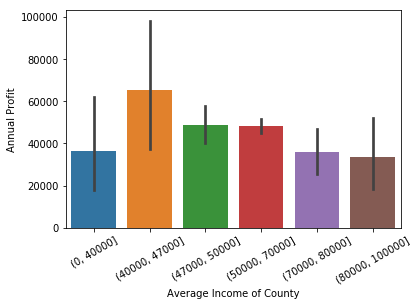

In [104]:
# Once again, it appears that suburban (i.e., middle income) counties have the best annual profits:
ax = sns.barplot(x=stores['income_bins'], y=stores['annual_profit_per_store'])
ax.set(xlabel='Average Income of County', ylabel='Annual Profit')
labels = ax.get_xticklabels() # get x labels
ax.set_xticklabels(labels, rotation=30)
plt.show()

### Population

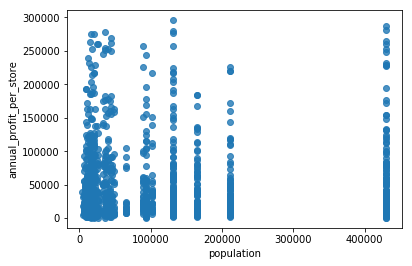

In [43]:
# The population in the county doesn't seem to have much relationship with annual profits
# Population falls into specific bands (certain high-population counties)
sns.regplot(x=stores['population'], y=stores['annual_profit_per_store'], fit_reg=False)

In [80]:
# I think population would be a good case for binning:
bins = [0, 30000, 50000, 70000, 100000, 200000, 300000, 500000]
stores['pop_bins'] = pd.cut(stores['population'], bins)

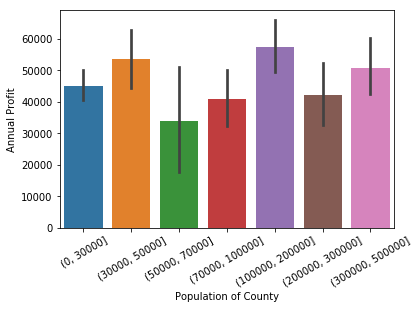

In [81]:
# Again, it appears suburban (i.e., midsize) counties have the best annual profits; but the pattern isn't clear

ax = sns.barplot(x=stores['pop_bins'], y=stores['annual_profit_per_store'])
ax.set(xlabel='Population of County', ylabel='Annual Profit')
labels = ax.get_xticklabels() # get x labels
ax.set_xticklabels(labels, rotation=30)
plt.show()